# Density Plots

Notebook to explore the density plots of the predicted probability.

Based on this notebook we will implement this logic in the train script to automatically log the density plots for:
* train
* test
* oot 

splits to mlflow

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from hydra.utils import instantiate
from hydra import compose, initialize

from my_logger.custom_logger import  logger
from ProcessData.data_splitter import data_splitter
from ProcessData.dataset import Dataset


 2024-03-08 09:49:39,784 -  INFO  	: my_logger.custom_logger - Logger is set up.


In [2]:
initialize(config_path="conf/", version_base=None)
cfg = compose(config_name="config.yaml")

In [3]:

data_pipeline = instantiate(cfg.data_pipeline)
df = pd.read_csv(cfg.Data_Source)
df = data_pipeline.apply(df.copy())
dataset = Dataset(data=df, data_splitter=data_splitter)

 2024-03-08 09:49:46,388 -  INFO  	: my_logger.custom_logger - Step 1: functools.partial(<function shift_close at 0x000001C16F774720>): (15992, 492)
 2024-03-08 09:49:46,427 -  INFO  	: my_logger.custom_logger - Step 2: functools.partial(<function create_label at 0x000001C16F7747C0>): (15992, 494)
 2024-03-08 09:49:46,836 -  INFO  	: my_logger.custom_logger - Data is splitted
 2024-03-08 09:49:46,838 -  INFO  	: my_logger.custom_logger - train: 10874 records
 2024-03-08 09:49:46,840 -  INFO  	: my_logger.custom_logger - test: 2719 records
 2024-03-08 09:49:46,842 -  INFO  	: my_logger.custom_logger - oot: 2399 records


In [4]:
dataset.X_train[['Datum','next_close_price1', 'close_price1', 'diff']]

,Datum,next_close_price1,close_price1,diff
8418,23.04.2019 14:35:58,33.3,37.1,-3800.0
11253,23.04.2020 09:10:18,27.6,31.2,-3600.0
2948,11.08.2017 14:31:23,75.8,73.2,2600.0
8824,25.07.2019 20:37:03,38.1,38.1,0.0
428,14.11.2016 11:01:36,26.8,18.2,8600.0
...,...,...,...,...
7329,05.11.2018 19:26:57,59.1,54.6,4500.0
2984,15.08.2017 17:19:59,41.3,35.3,6000.0
9118,23.09.2019 09:29:50,27.6,31.4,-3800.0
610,28.11.2016 01:53:01,71.6,68.5,3100.0


In [5]:
dataset.y_train

8418     0
11253    0
2948     1
8824     1
428      1
        ..
7329     1
2984     1
9118     0
610      1
12933    1
Name: y, Length: 10874, dtype: int64

In [6]:
model_name = 'deploy/model.pkl'

current_directory = os.path.dirname(os.path.realpath('scoring_script.py'))
# Construct the relative path to the model file
model_path = os.path.join(current_directory, model_name)
logger.info(f'Get model from {model_path}')
# Check if the model file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file '{model_name}' not found in the current directory.")

# Load the model
with open (model_path, 'rb') as m:
    model = pickle.load(m)
print(type(model))

 2024-03-08 09:49:46,955 -  INFO  	: my_logger.custom_logger - Get model from C:\Users\bartw\Documents\cAlgo\Sources\Robots\Data_Collect_32\deploy/model.pkl
<class 'Model.SklearnPipeline.CustomPipeline'>


In [7]:
pred = model.predict_proba(dataset.X_oot)

 2024-03-08 09:49:46,988 -  INFO  	: my_logger.custom_logger - Selecting features from Dataset
 2024-03-08 09:49:47,000 -  INFO  	: my_logger.custom_logger - final cols: Index(['cci1', 'cci10', 'cci2', 'cci3', 'cci4', 'cci5', 'cci6', 'cci7', 'cci8',
       'cci9', 'close_price1', 'close_price10', 'close_price2', 'close_price3',
       'close_price4', 'close_price5', 'close_price6', 'close_price7',
       'close_price8', 'close_price9', 'open_price1', 'open_price10',
       'open_price2', 'open_price3', 'open_price4', 'open_price5',
       'open_price6', 'open_price7', 'open_price8', 'open_price9', 'regrs1',
       'regrs10', 'regrs2', 'regrs3', 'regrs4', 'regrs5', 'regrs6', 'regrs7',
       'regrs8', 'regrs9', 'rsi1', 'rsi10', 'rsi2', 'rsi3', 'rsi4', 'rsi5',
       'rsi6', 'rsi7', 'rsi8', 'rsi9', 'sma1', 'sma10', 'sma2', 'sma3', 'sma4',
       'sma5', 'sma6', 'sma7', 'sma8', 'sma9', 'tv1', 'tv10', 'tv2', 'tv3',
       'tv4', 'tv5', 'tv6', 'tv7', 'tv8', 'tv9', 'williams1', 'williams10',

C:\Users\bartw\AppData\Local\Temp\ipykernel_6392\465720939.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pred[:,1], shade=True)
c:\Users\bartw\anaconda3\envs\credit_score\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


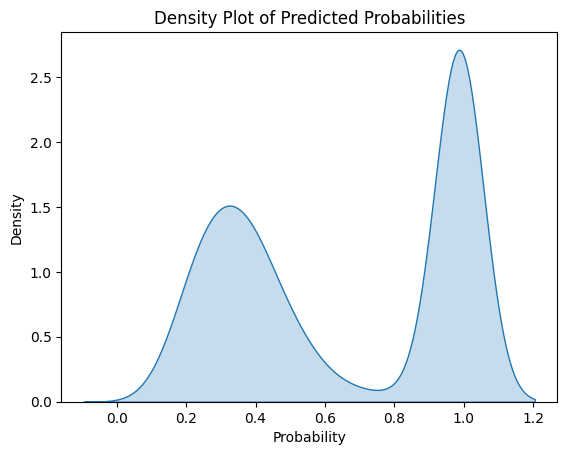

In [9]:
sns.kdeplot(pred[:,1], shade=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Density Plot of Predicted Probabilities')
plt.show()

c:\Users\bartw\anaconda3\envs\credit_score\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bartw\anaconda3\envs\credit_score\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


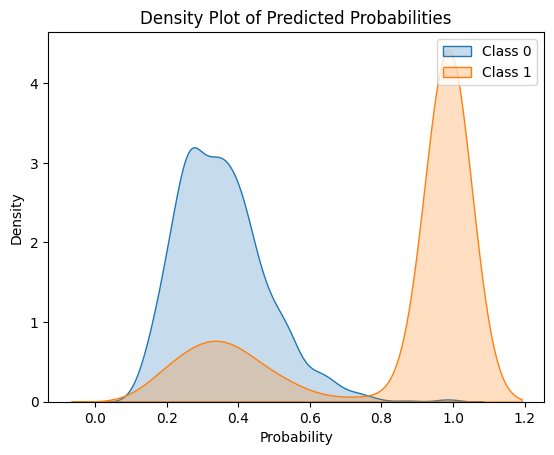

In [12]:


sns.kdeplot(pred_0, fill=True)
sns.kdeplot(pred_1, fill=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Density Plot of Predicted Probabilities')
plt.legend(['Class 0', 'Class 1'])
plt.show()
